<a href="https://colab.research.google.com/github/al34n1x/DataScience/blob/master/4.Estadistica/Estadistica_Sesi%C3%B3n_3_con_soluciones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro a la estadística (Sesión 3)

---



## Estadística inferencial

Teniendo en cuenta los datos a continuación, ¿cómo respondemos preguntas como: ¿es el tamaño de grano mayor en el depósito B que en el depósito A?

![grain size](https://github.com/al34n1x/DataScience/blob/master/img/example-grain-size.png?raw=true)

Interesado en saber si los niveles de energía eran diferentes en los depósitos A y B. Esto tendrá relación con las teorías de cómo se formaron. La muestra de B tiene una media más alta, pero ¿es solo una variación casual?

Para responder a esta pregunta, nosotros:

* Formular hipótesis formales.
* Aplicar prueba de hipótesis estadística apropiada.

## Hipótesis

Formulamos dos hipótesis:
La *hipótesis nula* (H0):

> *No hay diferencia en el tamaño medio máximo de grano para las muestras obtenidas de los depósitos A y B.*

... y una *hipótesis alternativa* (H1):

> *El tamaño medio máximo de grano es mayor en la muestra B que en la muestra A.*

Solo acepte H1 si es muy poco probable que H0 pueda explicar nuestras observaciones; de lo contrario, rechace H1.

## Prueba de hipótesis

Existen muchos tipos diferentes de pruebas estadísticas:

* Para probar diferentes tipos de hipótesis.
* Para manejar diferentes tipos de datos.

### Prueba T de Student

[La estadística t fue introducida en 1908 por William Sealy Gosset, un químico que trabajaba para la fábrica de cerveza Guinness en Dublín, Irlanda ("Student" era su seudónimo).](http://en.wikipedia.org/wiki/Student%27s_t-test) La prueba T de Student accede a la probabilidad de que dos muestras tengan la misma media subyacente. Python proporciona el método
[scipy.stats.ttest_ind](http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html). Esta es una prueba para la hipótesis nula de que 2 muestras independientes tienen valores promedio (esperados) idénticos. Esta prueba supone que las poblaciones tienen variaciones idénticas.

* Toma dos matrices de valores (es decir, dos muestras).
* Devuelve *t-statistic*, que describe cuán diferentes son las medias.
* Devuelve *valor p*, le indica la probabilidad de observar lo que hicimos si la hipótesis nula es cierta.

En el ejemplo de tamaño de grano anterior, el estadístico t y los valores p son -1.1 y 0.28 respectivamente. **¿Es una probabilidad de 0.28 suficiente para rechazar H0?**

In [1]:
# Nuevamente, hagamos un ejemplo trivial para asegurarnos de que sabemos lo que está sucediendo allí. 
import scipy.stats as stats

# Genero dos conjuntos de datos aleatorios con una distribución normal
# y la misma media.
d1 = stats.norm.rvs(size=100000)
d2 = stats.norm.rvs(size=100000)

# ttest_ind es una prueba de dos lados para la hipótesis nula de que 2 muestras 
# independientes tienen valores promedio (esperados) idénticos.
t_statistic, p_value = stats.ttest_ind(d1, d2)
print ("t-statistic = ", t_statistic)
print ("p-value = ", p_value)

t-statistic =  -0.05682717569407178
p-value =  0.954682922607643


## Valor P

El valor p se usa para determinar la probabilidad de que la hipótesis nula fuera verdadera: es la probabilidad de observar un estadístico de prueba más extremo en la dirección de la hipótesis alternativa. Por ejemplo, si el valor p es muy pequeño, entonces la hipótesis nula es "improbable". Si el valor p es mayor que algún umbral preestablecido, entonces se considera "probable".

Por lo tanto, si el valor p es menor que (o igual a) $\alpha$, entonces la hipótesis nula se rechaza a favor de la hipótesis alternativa. Y, si el valor P es mayor que $ \alpha $, entonces la hipótesis nula no se rechaza. Comúnmente, el umbral se establece en $ p = 0.05 $, ¡pero es arbitrario!

Los pasos involucrados en el uso del enfoque del valor P para realizar cualquier prueba de hipótesis son:

* Especifique las hipótesis nulas y alternativas y elija la prueba adecuada.
* Decide el nivel de significación para el valor p, $ \alpha $.
* Calcular el valor del estadístico de prueba y el valor p.
* Considere, si la hipótesis nula es verdadera, ¿cuál es la probabilidad de que observemos un estadístico de prueba más extremo en la dirección de la hipótesis alternativa que lo que hicimos? Observe cómo esta pregunta es equivalente a la pregunta respondida en los juicios penales: "Si el acusado es inocente, ¿cuál es la posibilidad de que observemos evidencia criminal tan extrema?"
* Si el valor p es menor que (o igual a) $ \alpha $, rechace la hipótesis nula a favor de la hipótesis alternativa. De lo contrario, acepte la hipótesis nula.

> En 2012, es probable que haya escuchado en las noticias el descubrimiento del bosón de Higgs. La frase *five-sigma* se usó para describir la fuerza del descubrimiento. Este es un valor p de 3x10$^{-7} $. [Leer más.](Http://blogs.scientificamerican.com/observations/five-sigmawhats-that/)

En el ejemplo de tamaño de grano anterior, el valor p es 0.28, que está muy por encima del nivel significativo de 0.05. Por lo tanto, se dice que el resultado es *no significativo*: evidencia insuficiente para rechazar H0.

## Colas y niveles de significación

**Prueba de una cola**:
Formule la hipótesis H1: *El tamaño medio máximo de grano es mayor en la muestra B que en la muestra A*. Ahora estamos probando si la media de B es mayor que la media de A, no es diferente de la media de A.

La figura a continuación ilustra la distribución de todos los valores t posibles: el resultado es significativo si el valor cae en la región azul.	

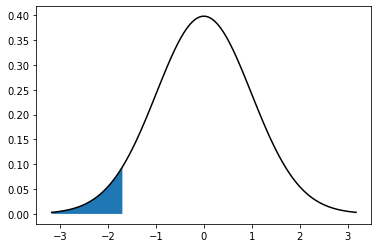

In [2]:
import numpy as np
import matplotlib.pyplot as plt

n = 100
df = n-1
x = np.linspace(stats.t.ppf(0.001, df), stats.t.ppf(0.999, df), n)
p = stats.t.pdf(x, df)

plt.plot(x, p, 'k')
plt.fill_between(x, 0, p, interpolate=True,
                 where=(x<=stats.t.ppf(0.05, df)))
plt.show()

**Prueba de dos colas**: Hipótesis de forma H1: *El tamaño medio máximo de grano es diferente en las dos muestras*. Hay dos formas posibles en que puede ser diferente: mayor que *o* menor que. La prueba de dos colas tiene dos *regiones de significación* - una en cada cola - cada mitad del tamaño de la región de significación de una cola.

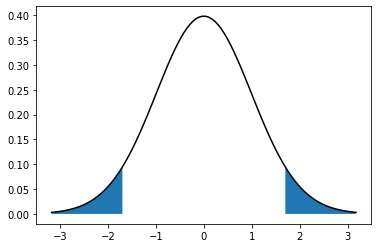

In [3]:
plt.plot(x, p, 'k')
plt.fill_between(x, 0, p, interpolate=True,
                 where=((x<=stats.t.ppf(0.05, df)) | (x>=stats.t.ppf(0.95, df))))
plt.show()

### Colas en la práctica

1. ¡Decide si tu prueba es de una o dos colas ANTES de hacerlo!
2. Valores devueltos por [scipy.stats](http://docs.scipy.org/doc/scipy/reference/stats.html) funciones (por ejemplo, [ttest_ind](http://docs.scipy.org/doc/scipy/reference/generate/scipy.stats.ttest_ind.html#scipy.stats.ttest_ind)) son para pruebas de dos colas (¡en su mayoría!)
  1. Si su prueba es de dos colas, no hay problema
  2. Si la prueba es de una cola, reduzca a la mitad el valor p antes de interpretarlo.
En el ejemplo anterior, el valor p fue de 0.28, pero este es un valor de dos colas mientras que la prueba fue de una cola. El valor real para la prueba fue 0.14. En este caso todavía no es significativo (> 0.05), pero la reducción a la mitad podría marcar la diferencia fácilmente.

## Más sobre la prueba t.

La prueba T es la prueba estadística más utilizada, pero no siempre es adecuada. Hace varias suposiciones.

* Los resultados sensibles necesitan tamaños de muestra razonablemente grandes.
  * Esto también se aplica a otras pruebas.
* Asume que los datos en las muestras se distribuyen normalmente:
  * Puede o no ser realmente cierto.
  * Si no, considere usar pruebas no paramétricas.

## Equivalentes no paramétricos

La prueba no paramétrica más utilizada es la [prueba U de Mann-Whitney](http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html#scipy.stats.mannwhitneyu) .

* Utiliza rangos de datos (como la correlación de Spearman).
* No requiere que las distribuciones de datos sean normales.
* Prueba menos potente (más falsos negativos) si las distribuciones son normales (como todas las pruebas no paramétricas).

Cuando hay un modelo matemático disponible, la [Prueba de Kolmorogov-Smirnov (KS)](http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kstest.html#scipy.stats.kstest) es comúnmente utilizado.

* La prueba K-S es para "bondad de ajuste": qué tan bien se ajusta una distribución a un modelo matemático.
* La variante de prueba K-S "Dos muestras" se puede utilizar como una alternativa no paramétrica a una prueba t.
* Prueba más que solo la diferencia de medias: prueba otros aspectos de la forma de distribución.
* Se utiliza para responder preguntas como '¿parecen estas dos muestras provenir de la misma población subyacente'?

## Pruebas de hipótesis de correlación

Ya hemos visto que los valores de p pueden obtenerse para correlaciones (Pearson o Spearman). Podemos probar hipótesis de correlación con estos.

* H0: "La marca de Dorset y la marca de fin de año no están relacionadas"
* H1: "Hay una correlación entre la marca de Dorset y la marca de fin de año"

Esta es una prueba de dos colas y utilizaremos un nivel de significancia del 5%.

* Pearson R es 0.27, p = 0.014 --- significativo, por lo tanto, rechace H0 a favor de H1.
* Spearman R es 0.19, p = 0.087 --- no significativo, por lo tanto, acepte H0.

Entonces, si podemos usar Pearson, podemos aceptar H1, pero con Spearman no podemos, no hay suficiente evidencia. ¡Necesitamos hacer un mejor trabajo para decidir cuál usar!
			

## Pruebas de normalidad

En lugar de adivinar si una distribución es normal, ¿podemos probarla?

Sí, simplemente se convierte en otra prueba de hipótesis:

* $H_0$: 'La distribución subyacente es normal'.
* $H_1$: 'La distribución subyacente no es normal'.

Existen muchas pruebas diferentes de normalidad, sin acuerdo universal sobre cuál es el mejor. Una buena solución es la prueba combinada *D'Agostino y Pearson*, proporcionada por Python mediante el método [scipy.stats.normaltest](http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html). Esta función prueba la hipótesis nula de que una muestra proviene de una distribución normal.

Esta también es una buena oportunidad para ilustrar claramente el uso del valor p utilizando dos casos de prueba muy claros.

Populating the interactive namespace from numpy and matplotlib


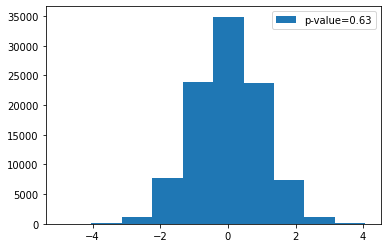

In [4]:
import numpy as np
from scipy import stats
import pylab as pl
%pylab inline

# Crear una distribución normal.
values = stats.norm.rvs(size=100000)
statistic, pvalue = stats.normaltest(values)
pl.hist(values)   #podemos agregar mas escalones para hacer el plot más suave?
pl.legend(("p-value=%.2g"%pvalue, ))
pl.show()

In [5]:
# Sin embargo, observe cómo varía para diferentes conjuntos de datos.
# ¡Incluso con datos perfectos puede obtener falsos positivos!
for i in range(10):
    values = stats.norm.rvs(size=1000)
    statistic, pvalue = stats.normaltest(values)
    print (i, "p-value = ", pvalue)

# En la implementación de SciPy de estas pruebas, puede interpretar el valor p de la siguiente manera.

# p <= alfa: rechazar H0, no es distrib normal.
# p> alfa: no puede rechazar H0,es distrib normal.

0 p-value =  0.6506046240487637
1 p-value =  0.752102994333167
2 p-value =  0.4980367897524618
3 p-value =  0.05965649979695005
4 p-value =  0.8204860250111522
5 p-value =  0.40769020483818386
6 p-value =  0.2669690166407365
7 p-value =  0.8427089706626201
8 p-value =  0.22138321433627411
9 p-value =  0.6888729368511431


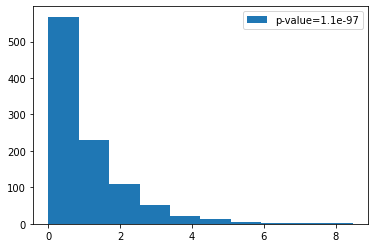

In [6]:
# Sin embargo, el grado de variabilidad para el valor p se pone en contexto
# cuando lo compara con otros tipos de distribuciones, p. ej. La distribución exponencial.
values = stats.expon.rvs(size=1000)
statistic, pvalue = stats.normaltest(values)
pylab.hist(values)
pylab.legend(("p-value=%.2g"%pvalue, ))
pylab.show()

In [7]:
# Y si hacemos varias veces el test?
for i in range(10):
    values = stats.expon.rvs(size=1000)
    statistic, pvalue = stats.normaltest(values)
    print (i, "p-value = ", pvalue)

# En la implementación de SciPy de estas pruebas, puede interpretar el valor p de la siguiente manera.

# p <= alfa: rechazar H0, no normal.
# p> alfa: no puede rechazar H0, normal.

0 p-value =  1.124860494316292e-140
1 p-value =  3.1514905332928953e-96
2 p-value =  6.22741136998453e-81
3 p-value =  9.51914707498514e-97
4 p-value =  1.2539544474906482e-110
5 p-value =  2.1320586215495415e-77
6 p-value =  4.312206985256976e-77
7 p-value =  1.620555410894962e-77
8 p-value =  3.5856801443319223e-93
9 p-value =  3.7825122174555507e-73


# Demostración: ¿son normales las distribuciones de marcas en el ejemplo de marcas del primer año?

In [8]:
# Leemos los registros
record = np.recfromcsv("http://cdn.jsdelivr.net/gh/al34n1x/DataScience/data/first_year_marks.csv") 

print (record.dtype.names)

('field_mark', 'overall_year')


Skew =  11.90871817961577
H0 - field marks tiene distrib normal: 
Rechazo a favor de H1.


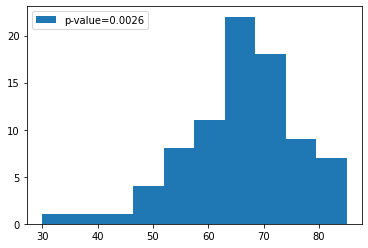

In [9]:
field_mark = np.array(record["field_mark"], dtype=float)

k2, p = stats.normaltest(field_mark)
print ("Skew = ", k2) #asimetría
print ("H0 - field marks tiene distrib normal: ")
if p<0.05:
    print ("Rechazo a favor de H1.")
else:
    print ("Acepto.")

pl.hist(field_mark, bins=10)
pl.legend(("p-value=%.2g"%p, ))
pl.show()

Skew =  0.0402331177377869
H0 - overall year tiene distrib normal: 
Acepto.


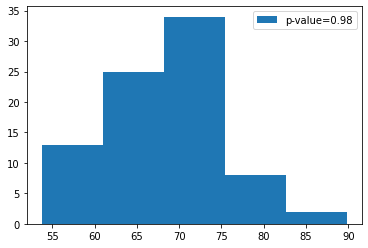

In [10]:
overall_year = np.array(record["overall_year"], dtype=float)

k2, p = stats.normaltest(overall_year)
print ("Skew = ", k2)
print ("H0 - overall year tiene distrib normal: ")
if p<0.05:
    print  ("Rechazo a favor de H1.")
else:
    print ("Acepto.")

pl.hist(overall_year, bins=5)
pl.legend(("p-value=%.2g"%p, ))
pl.show()

Como al menos uno de estos conjuntos de datos no tiene una distribución normal, debemos usar la prueba de correlación de Spearman.

# Ejercicio 7.1: Prueba de hipótesis

1. Tengo dos conjuntos de fósiles de trilobites de diferentes localidades. Creo que son de la misma especie, pero quiero una confirmación cuantitativa, sobre la base de su relación media de longitud:ancho ([triloshape1.csv](http://cdn.jsdelivr.net/gh/al34n1x/DataScience/data/triloshape1.csv), [triloshape2.csv](http://cdn.jsdelivr.net/gh/al34n1x/DataScience/data/triloshape2.csv)) ¿hay evidencia de que son diferentes?
2. He medido porcentajes de mica en muestras de rocas ígneas de dos localidades diferentes ([micapercent1.csv](http://cdn.jsdelivr.net/gh/al34n1x/DataScience/data/micapercent1.csv), [micapercent2.csv ](http://cdn.jsdelivr.net/gh/al34n1x/DataScience/data/micapercent2.csv)). El porcentaje medio de mica es menor en la segunda localidad y tengo una teoría geológica que puede explicar esto, pero primero necesito descartar la posibilidad de que el menor contenido de mica se deba al azar.

En cada caso, construya (es decir, escriba) sus dos hipótesis, decida cómo están redactadas si son de una o dos colas, luego use su programa para evaluar cuál debe aceptar.

Consejos:

* Probar conjuntos de datos para normalidad (es decir, tienen distribución normal). Use la prueba D'Agostino & Pearson para proporcionar probabilidades de normalidad.
* Pruebe si sus medias difieren significativamente. Al probar si las medias son diferentes, debe usar un valor p de Mann-Whitney de dos colas o un valor p de la prueba T de dos colas, según el resultado de la prueba de normalidad. Recuerde que la función scipy.stats Mann-Whitney devuelve un valor p de una cola.



In [11]:
# Su solución aquí


# Read in data
import numpy as np

# Read in the records.
record1 = np.recfromcsv("http://cdn.jsdelivr.net/gh/al34n1x/DataScience/data/triloshape1.csv") 
record2 = np.recfromcsv("http://cdn.jsdelivr.net/gh/al34n1x/DataScience/data/triloshape2.csv") 

print (record1.dtype.names)
print (record2.dtype.names)

('082',)
('116',)


In [12]:

# Read in the records - take II.
record1 = np.recfromtxt("http://cdn.jsdelivr.net/gh/al34n1x/DataScience/data/triloshape1.csv") 
record2 = np.recfromtxt("http://cdn.jsdelivr.net/gh/al34n1x/DataScience/data/triloshape2.csv") 

triloshape1 = np.array(record1, dtype=float)
triloshape2 = np.array(record2, dtype=float)

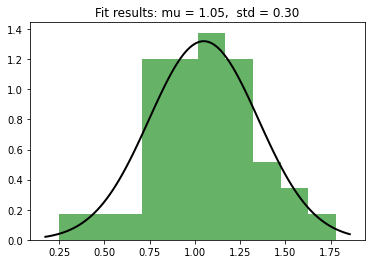

In [13]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt


# Generate some data for this demonstration.
data = triloshape1

# Fit a normal distribution to the data:
mu, std = norm.fit(data)

# Plot the histogram.
plt.hist(data, bins=10, density=True, alpha=0.6, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

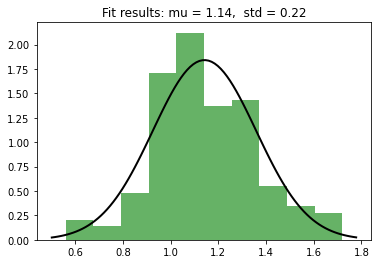

In [14]:

# Generate some data for this demonstration.
data = triloshape2

# Fit a normal distribution to the data:
mu, std = norm.fit(data)

# Plot the histogram.
plt.hist(data, bins=10, density=True, alpha=0.6, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

In [15]:
# Los gráficos no parecen muy convincentes. Sin embargo, siempre es mejor usar una prueba cuantitativa.
# Utilice la prueba de D'Agostino & Pearson para probar la hipótesis nula de que provienen muestras
# una distribución normal.
from scipy import stats

k2_1, p_1 = stats.normaltest(triloshape1)
k2_2, p_2 = stats.normaltest(triloshape2)

print ("p-values = ", p_1, p_2)
if p_1 <= 0.05 or p_2 <= 0.05:
    print ("Rechazar la hipotesis de que las muestras vienen de una distribución normal.")
else:
    print ("Aceptar la hipotesis de que las muestras vienen de una distribución normal.")

p-values =  0.5253419681562425 0.5432794516844254
Aceptar la hipotesis de que las muestras vienen de una distribución normal.


Ahora que estamos seguros de que las dos distribuciones provienen de una distribución normal, estamos seguros de que deberíamos usar la prueba T para comparar estos conjuntos de datos. Esta es una prueba de dos lados para la hipótesis nula de que 2 muestras independientes tienen valores promedio (esperados) idénticos.

In [16]:
t, p = stats.ttest_ind(triloshape1, triloshape2)

print ("T-test - (t, p) = %g, %g"%(t, p))
if p<=0.05:
    print ("Rechazo la hipótesis de que las poblaciones son iguales."),
else:
    print ("Acepto la hipótesis de que las poblaciones son iguales.")

T-test - (t, p) = -2.09157, 0.0380368
Rechazo la hipótesis de que las poblaciones son iguales.


Pregunta 2


In [17]:
# Read in data
import numpy as np

# Read in the records.
record1 = np.recfromcsv("http://cdn.jsdelivr.net/gh/al34n1x/DataScience/data/micapercent1.csv") 
record2 = np.recfromcsv("http://cdn.jsdelivr.net/gh/al34n1x/DataScience/data/micapercent2.csv") 

print (record1.dtype.names)
print (record2.dtype.names)

('89',)
('62',)


In [18]:
# Read in the records - take II.
record1 = np.recfromtxt("http://cdn.jsdelivr.net/gh/al34n1x/DataScience/data/micapercent1.csv") 
record2 = np.recfromtxt("http://cdn.jsdelivr.net/gh/al34n1x/DataScience/data/micapercent2.csv") 

micapercent1 = np.array(record1, dtype=float)
micapercent2 = np.array(record2, dtype=float)

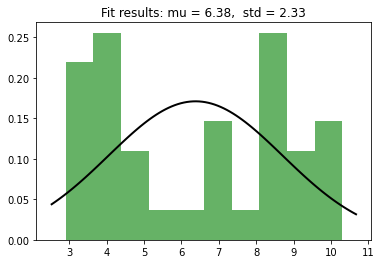

In [19]:
# Generate some data for this demonstration.
data = micapercent1

# Fit a normal distribution to the data:
mu, std = norm.fit(data)

# Plot the histogram.
plt.hist(data, bins=10, density=True, alpha=0.6, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

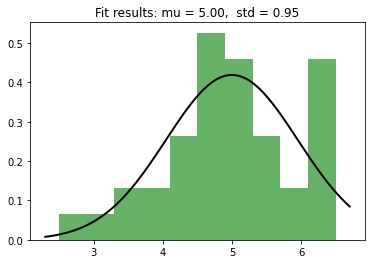

In [20]:
# Generate some data for this demonstration.
data = micapercent2

# Fit a normal distribution to the data:
mu, std = norm.fit(data)

# Plot the histogram.
plt.hist(data, bins=10, density=True, alpha=0.6, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

In [21]:
# Los gráficos no parecen muy convincentes. Sin embargo, siempre es mejor usar una prueba cuantitativa.
# Utilice la prueba de D'Agostino & Pearson para probar la hipótesis nula de que provienen muestras
# una distribución normal.
from scipy import stats

k2_1, p_1 = stats.normaltest(micapercent1)
k2_2, p_2 = stats.normaltest(micapercent2)

print ("p-values = ", p_1, p_2)
if p_1 <= 0.05 or p_2 <= 0.05:
    print ("Rechazar la hipotesis de que las muestras vienen de una distribución normal.")
else:
    print ("Aceptar la hipotesis de que las muestras vienen de una distribución normal.")

p-values =  3.19642639296486e-05 0.36414825539139845
Rechazar la hipotesis de que las muestras vienen de una distribución normal.


In [22]:
u, p = stats.mannwhitneyu(micapercent1, micapercent2)

# Este es un test e una cola

print ("Rank test Mann-Whitney de una cola p-value = ", p, " and u value = ", u)
if p<=0.05:
    print ("Rechazo la hipótesis de que las poblaciones son iguales."),
else:
    print ("Acepto la hipótesis de que las poblaciones son iguales.")

Rank test Mann-Whitney de una cola p-value =  0.021983043515195907  and u value =  512.5
Rechazo la hipótesis de que las poblaciones son iguales.


# Práctica 7.2: Prueba de Kolmogorov-Smirnov

* Utilice los datos de trilobite anteriores y realice una prueba de Kolmogorov-Smirnov a dos caras (dos muestras) para determinar si provienen de la misma distribución o no.
* Pruebe si cada dato de trilobites proviene de una distribución exponencial o no. (Deberá generar una distribución exponencial para esta pregunta y normalizar todas las distribuciones primero)

**NB**: La función necesaria PUEDE encontrarse en scipy.stats [aquí](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ks_2samp.html)

## BONUS (más difícil)

* Trace las funciones de distribución acumulativa (CDF) para los datos de trilobites en una figura como gráficos lineales.
* Trace un CDF exponencial encima de esto también (con una línea discontinua)
* ¿Alguna vez hubo alguna sospecha de que los datos pudieran ser exponenciales?

**PISTA** los histogramas tienen un argumento acumulativo que puede utilizar.

In [23]:
# Su solución aquí

p-value = 0.14937368340991186
Acepto
la hipotesis de que las muestras provienen de la misma distribución.


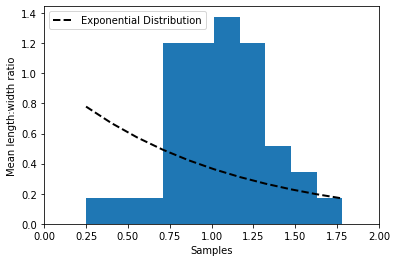

H0: Trilobyte dataset 1 es una distribución exponencial
p-value = 9.945113702558572e-07
Rechazo H0: las muestras NO vienen 
de una distribución exponencial.


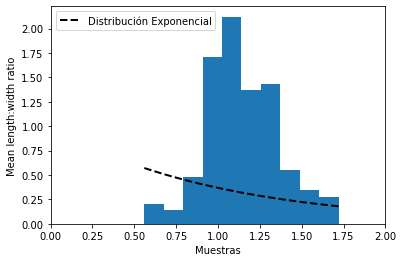

H0: Trilobyte dataset 2 es una distribución exponencial
p-value = 5.218048215738236e-15
Rechazo H0: las muestras NO vienen 
de una distribución exponencial.


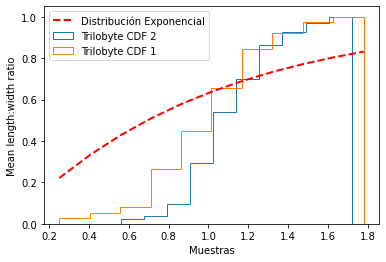

In [24]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Leemos los registros
record1 = np.recfromtxt("http://cdn.jsdelivr.net/gh/al34n1x/DataScience/data/triloshape1.csv") 
record2 = np.recfromtxt("http://cdn.jsdelivr.net/gh/al34n1x/DataScience/data/triloshape2.csv") 

triloshape1 = np.array(record1, dtype=float)
triloshape2 = np.array(record2, dtype=float)

D, p = stats.ks_2samp(triloshape1, triloshape2)

print ("p-value = {}".format(p))
if p <= 0.05:
    print ("Rechazo",)
else:
    print ("Acepto",)
print ("la hipotesis de que las muestras provienen de la misma distribución.")


plt.figure()
# Genero un histograma de los datos y superpongo el exponencial normalizado
# distribución
n, bins, patches = plt.hist(triloshape1, bins=10, density=True)
plt.plot(bins,stats.expon.pdf(bins),color = 'k', lw = 2., 
         linestyle='--', label = 'Exponential Distribution')
plt.xlim(0,2)
plt.xlabel("Samples")
plt.ylabel("Mean length:width ratio")
plt.legend(loc = 'best')
plt.show()

D1, p1 = stats.ks_2samp(triloshape1, stats.expon.pdf(bins))
# Como antes comparamos triloshape1 con otro conjunto de datos. Esta vez
# es con una distribución exponencial.
print ("H0: Trilobyte dataset 1 es una distribución exponencial")
print ("p-value = {}".format(p1))
if p1 <= 0.05:
    print ("Rechazo H0: las muestras NO vienen ",)
else:
    print ("Acepto H0: las muestras SI vienen ",)
print ("de una distribución exponencial.")


# Repeat as just done, for the second set of data
plt.figure()
n, bins, patches = plt.hist(triloshape2, bins=10, density=True)
plt.plot(bins,stats.expon.pdf(bins),color = 'k', lw = 2., 
         linestyle='--', label = 'Distribución Exponencial')
plt.xlim(0,2)
plt.xlabel("Muestras")
plt.ylabel("Mean length:width ratio")
plt.legend(loc = 'best')
plt.show()

D2, p2 = stats.ks_2samp(triloshape2, stats.expon.pdf(bins))
print ("H0: Trilobyte dataset 2 es una distribución exponencial")
print( "p-value = {}".format(p2))
if p2 <= 0.05:
    print ("Rechazo H0: las muestras NO vienen ",)
else:
    print ("Acepto H0: las muestras SI vienen ",)
print ("de una distribución exponencial.")


""" BONUS """

plt.figure()
n1, bins1, patches1 = plt.hist(triloshape2, bins=10, density=True,
                               cumulative=True, histtype = 'step', label = 'Trilobyte CDF 2')
n2, bins2, patches2 = plt.hist(triloshape1, bins=10, density=True,
                               cumulative=True, histtype = 'step', label = 'Trilobyte CDF 1')
plt.plot(bins2, stats.expon.cdf(bins2), color='r', lw=2., 
         linestyle='--', label = 'Distribución Exponencial')
plt.xlabel("Muestras")
plt.ylabel("Mean length:width ratio")
plt.legend(loc = 'best')
plt.show()

# There was not really any reason to suspect exponetiality however this is a useful exercise
# on manipulating distributions other than normal.